In [100]:
#Titanic kaggle exercise

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [103]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [104]:
X, y = train_dataset.drop('Survived', axis=1), train_dataset['Survived']

In [105]:
X = X.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1)

In [106]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


Data preprocessing

In [107]:
stats = X.info()
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB
None


In [108]:
mean_age = X['Age'].mean()
X['Age'].fillna(mean_age, inplace=True)

<ipython-input-108-7183adbb4f89>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(mean_age, inplace=True)


In [ ]:
"""
Alternative at the previous code

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_valuse=np.nan, strategy='mean')
X['Age'] = imputer.fit_transform(X[['Age']]
"""

In [109]:
stats = X.info()
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB
None


In [110]:
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

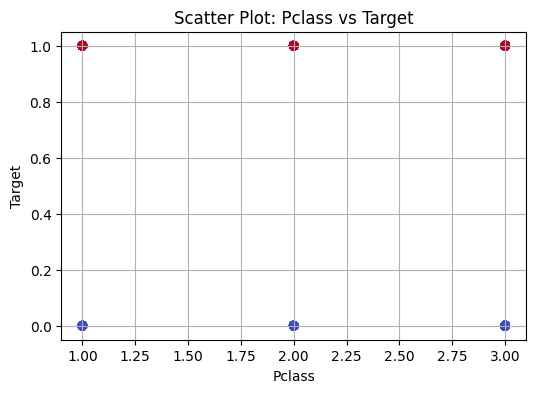

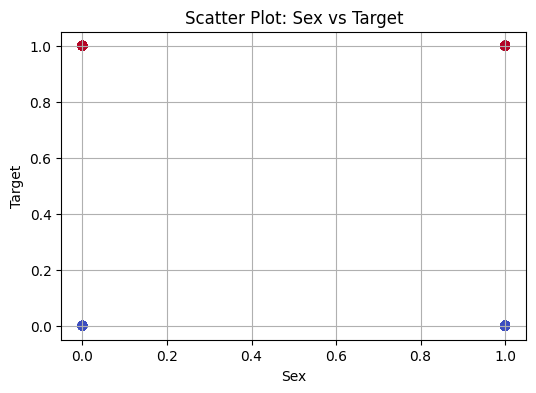

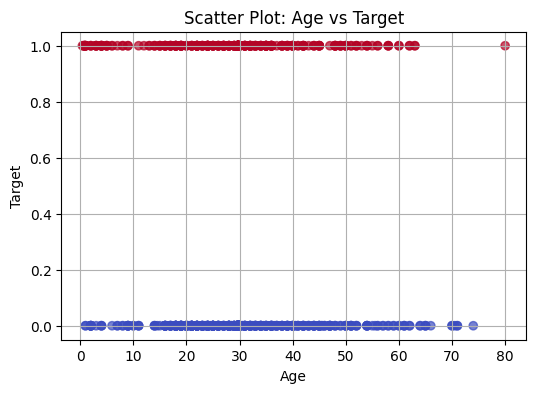

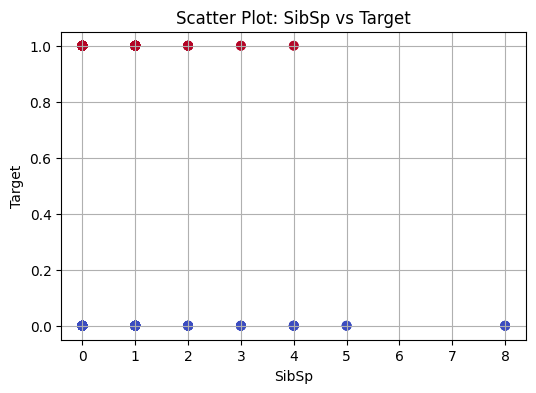

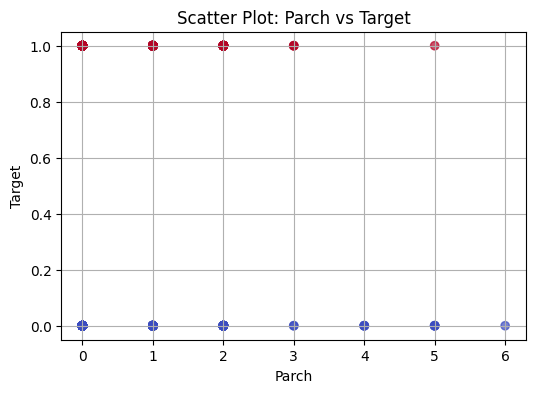

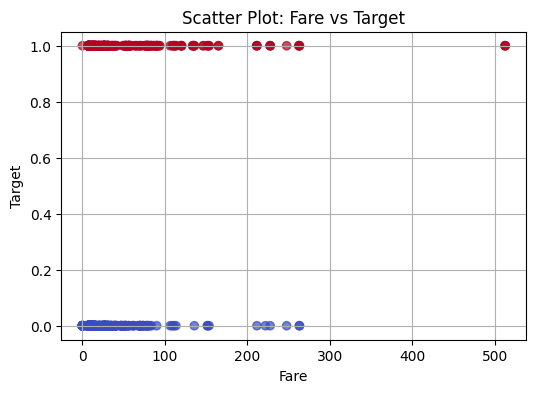

In [111]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y, alpha=0.7, c=y, cmap='coolwarm')
    plt.title(f'Scatter Plot: {column} vs Target')
    plt.xlabel(column)
    plt.ylabel('Target')
    plt.grid(True)
    plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          AdaBoostClassifier(),
          SVC(),
          GaussianNB()]


In [115]:
for model in models:
    kfold = KFold(n_splits=2)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(f"{model.__class__.__name__} Accuracy: {cv_result}")

LogisticRegression Accuracy: [0.82303371 0.79213483]
DecisionTreeClassifier Accuracy: [0.76404494 0.75      ]
RandomForestClassifier Accuracy: [0.78370787 0.79213483]
GradientBoostingClassifier Accuracy: [0.82303371 0.78932584]
AdaBoostClassifier Accuracy: [0.83426966 0.78089888]
SVC Accuracy: [0.83707865 0.79775281]
GaussianNB Accuracy: [0.81741573 0.77247191]


In [116]:
rf_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4]  # Solo rilevante per il kernel 'poly'
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [117]:
grid_search.best_params_

{'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [118]:
best_model = grid_search.best_estimator_

In [119]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_model.__class__.__name__} Accuracy: {accuracy}")

SVC Accuracy: 0.8100558659217877


In [120]:
testset = pd.read_csv('test.csv')
x_test = testset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis=1)

In [121]:
x_test['Age'].fillna(x_test['Age'].mean(), inplace=True)
x_test['Fare'].fillna(x_test['Fare'].mean(), inplace=True)

<ipython-input-121-66291d4ea8ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['Age'].fillna(x_test['Age'].mean(), inplace=True)
<ipython-input-121-66291d4ea8ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [122]:
x_test['Sex'] = le.fit_transform(x_test['Sex'])
x_test = scaler.transform(x_test)

In [123]:
y_pred = best_model.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
df = pd.read_csv('test.csv')
submission = pd.DataFrame({'PassengerId': df['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)